#THEORETICAL QUESTIONS


**1. What is unsupervised learning in the context of machine learning?**

Unsupervised learning refers to machine learning tasks where the algorithm works with unlabeled data to discover hidden patterns, structures, or relationships without being guided by pre-defined labels or target variables. The goal is to find meaningful groupings, dimensionality reduction, or data representation. Clustering is a primary example of unsupervised learning.

**2. How does K-Means clustering algorithm work?**

K-Means operates through iterative optimization:
- Initialize K cluster centers randomly
- Assign each data point to the nearest cluster center (using Euclidean distance)
- Update cluster centers as the mean of all points assigned to that cluster
- Repeat steps 2-3 until convergence (when centers no longer change significantly)
- The algorithm minimizes within-cluster variance (inertia)

**3. Explain the concept of a dendrogram in hierarchical clustering**

A dendrogram is a tree-like diagram that visualizes the hierarchical clustering process. It shows:
- Individual data points as leaves at the bottom
- Merging process as branches moving upward
- Height of branches representing the distance at which clusters merged
- By cutting the dendrogram at different heights, you can obtain different numbers of clusters

**4. What is the main difference between K-Means and Hierarchical Clustering?**

K-Means: Flat clustering method that partitions data into K pre-defined clusters; requires specifying K beforehand; uses centroid-based approach; faster and more scalable.

Hierarchical Clustering: Creates a tree-like structure of nested clusters; doesn't require specifying K beforehand; can use single/complete/average linkage; computationally more expensive but provides flexibility.

**5. What are the advantages of DBSCAN over K-Means?**

- Can discover clusters of arbitrary shapes (not just spherical)
- Automatically identifies outliers/noise points
- Doesn't require specifying number of clusters beforehand
- Handles varying density clusters better
- More robust to density variations in data

**6. When would you use Silhouette Score in clustering?**

Silhouette Score is useful for:
- Evaluating cluster quality without ground truth labels
- Determining optimal number of clusters
- Assessing cohesion (points should be close to their own cluster) and separation (points should be far from other clusters)
- Values range from -1 to 1; higher scores indicate better-defined clusters
- Can be calculated for each point and overall dataset

**7. What are the limitations of Hierarchical Clustering?**

- Computationally expensive: O(n^2) or O(n^3) time complexity
- Irreversible decisions: once clusters merge, cannot be separated
- Sensitive to outliers which can affect merging process
- Difficulty in cutting dendrogram to get optimal clusters
- May not work well with very large datasets

**8. Why is feature scaling important in clustering algorithms like K-Means?**

- Distance-based clustering uses Euclidean or similar distance metrics
- Features with larger scales dominate the distance calculation
- Unscaled features can bias clustering toward high-magnitude variables
- Standardization (z-score) or normalization ensures equal contribution from all features
- Prevents features with different units from skewing results

**9. How does DBSCAN identify noise points?**

- Points are classified as core points, border points, or noise (outliers)
- A point is a core point if it has at least minPts neighbors within eps distance
- Border points are within eps distance of core points but don't have enough neighbors themselves
- Noise points are neither core nor border points
- Remaining unclassified points after clustering are marked as noise

**10. Define inertia in the context of K-Means**

Inertia is the sum of squared distances from each data point to its assigned cluster center. It measures within-cluster compactness and is minimized by the K-Means algorithm. Lower inertia indicates tighter, more cohesive clusters, but continues to decrease as K increases.

**11. What is the elbow method in K-Means clustering?**

The elbow method helps determine optimal K by:
- Running K-Means for K = 1, 2, 3, ... up to some maximum value
- Plotting inertia (or within-cluster sum of squares) against K
- Looking for the 'elbow' point where inertia decrease slows significantly
- The K at the elbow represents the optimal number of clusters

**12. Describe the concept of 'density' in DBSCAN**

Density in DBSCAN refers to:
- The number of points within a specified radius (eps) around a point
- Core points are those with density >= minPts (neighbors within eps radius)
- Clusters are formed by connecting density-reachable points
- Regions with low density are classified as noise
- Allows clustering of arbitrary-shaped clusters with varying densities

**13. Can hierarchical clustering be used on categorical data?**

Yes, with modifications:
- Cannot use Euclidean distance directly for categorical data
- Must use appropriate distance metrics like Hamming distance, Gower distance, or Jaccard distance
- Can use linkage methods (single, complete, average) with categorical distance metrics
- More computationally challenging than numerical data clustering

**14. What does a negative Silhouette Score indicate?**

A negative Silhouette Score indicates:
- The data point is closer to its assigned cluster on average than to the nearest cluster
- Points are assigned to wrong clusters
- There's significant overlap between clusters
- The clustering quality is poor
- Possible need to reconsider number of clusters or algorithm choice

**15. Explain the term 'linkage criteria' in hierarchical clustering**

Linkage criteria determine how distances between clusters are calculated:
- Single Linkage: Distance = minimum distance between any two points from different clusters (prone to chaining)
- Complete Linkage: Distance = maximum distance between any two points (creates compact clusters)
- Average Linkage: Distance = average distance between all pairs of points
- Ward Linkage: Minimizes within-cluster variance (similar to K-Means philosophy)

**16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?**

- K-Means assumes roughly spherical clusters of similar sizes
- Elongated or elliptical clusters are handled poorly
- Clusters with different densities can cause misclassification
- The algorithm optimizes for minimizing inertia, not accounting for shape or density variations
- Points from sparse clusters may be assigned to dense clusters
- Requires careful K selection and scaling when cluster characteristics vary

**17. What are the core parameters in DBSCAN, and how do they influence clustering?**

eps (epsilon): Neighborhood radius
- Small eps: More points classified as noise, more clusters formed
- Large eps: Fewer noise points, clusters may merge

minPts: Minimum number of neighbors to form a core point
- Small minPts: Looser density requirements, larger clusters
- Large minPts: Stricter density requirements, more noise points
- Typically set to 2*dimensions or higher

These parameters critically control cluster formation and noise detection.

**18. How does K-Means++ improve upon standard K-Means initialization?**

K-Means++ provides smarter initialization:
- First center selected randomly from data points
- Subsequent centers selected with probability proportional to distance from existing centers
- Favors selecting centers far from previous ones
- Reduces likelihood of poor local optima
- Faster convergence and more consistent results
- Computationally negligible overhead

**19. What is agglomerative clustering?**

Agglomerative clustering is a bottom-up hierarchical clustering approach:
- Starts with each point as its own cluster
- Iteratively merges closest clusters based on linkage criteria
- Forms a dendrogram showing the hierarchical merge process
- More commonly used than divisive (top-down) clustering
- Results in nested clusters at different granularity levels

**20. What makes Silhouette Score a better metric than just inertia for model evaluation?**

- Inertia only measures within-cluster compactness; lower values always better
- Silhouette Score balances both cohesion (compactness) and separation (distinctiveness)
- Accounts for cluster separation: penalizes overlapping clusters
- Normalized between -1 and 1: easier interpretation than raw inertia values
- Can identify when K is suboptimal; inertia decreases monotonically with K
- Doesn't require ground truth labels
- Better for comparing different clustering solutions objectively

#PRACTICAL QUESTIONS

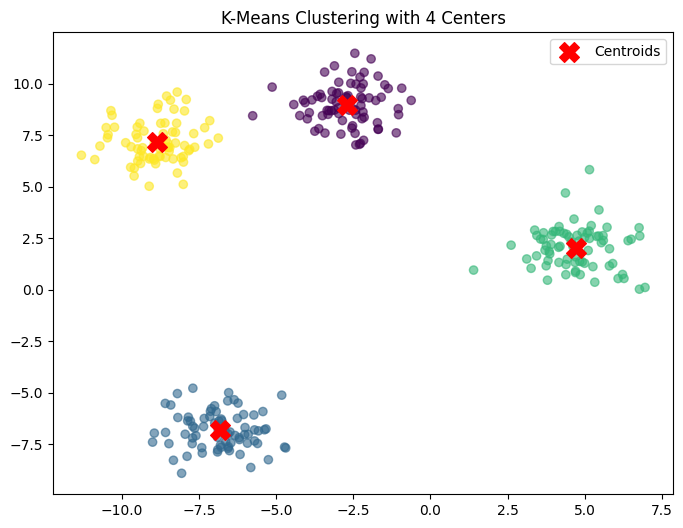

In [2]:
"""
Question 21: Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.
"""

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with 4 Centers')
plt.legend()
plt.show()

In [3]:
"""
Question 22: Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.
"""

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X_iris = iris.data
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(X_iris_scaled)

print("First 10 predicted labels:")
print(labels[:10])

First 10 predicted labels:
[1 1 1 1 1 1 1 1 1 1]


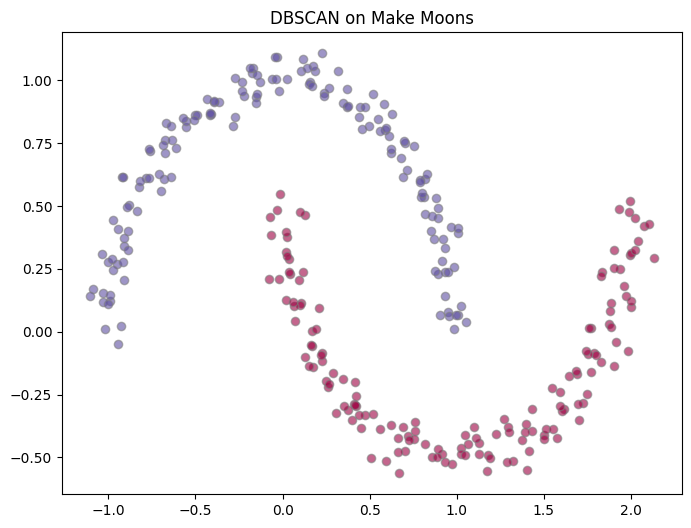

In [4]:
"""
Question 23: Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.
"""

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.15, min_samples=5)
labels = dbscan.fit_predict(X_moons)

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for outliers
    class_member_mask = (labels == k)
    xy = X_moons[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], edgecolors='k' if k == -1 else 'grey', alpha=0.6)
plt.title('DBSCAN on Make Moons')
plt.show()

In [7]:
"""
Question 24: Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.
"""


from sklearn.datasets import load_wine
X_wine = load_wine().data
X_wine_scaled = StandardScaler().fit_transform(X_wine)
kmeans_wine = KMeans(n_clusters=3, random_state=42)
labels_wine = kmeans_wine.fit_predict(X_wine_scaled)
print("- Cluster sizes:", {i: (labels_wine == i).sum() for i in range(3)})

- Cluster sizes: {0: np.int64(65), 1: np.int64(51), 2: np.int64(62)}


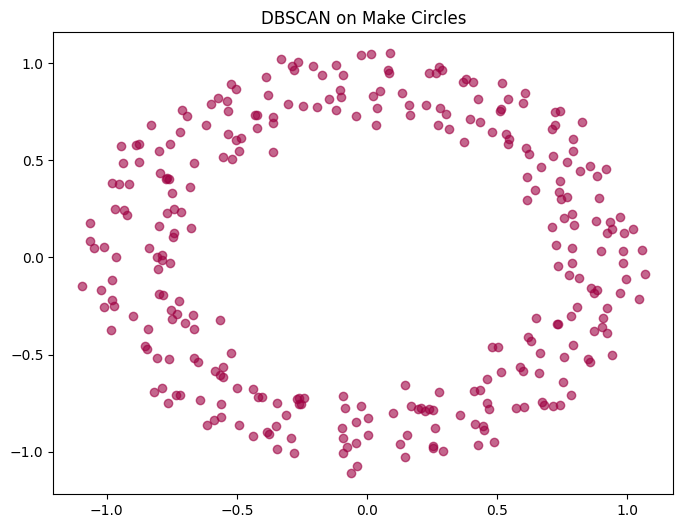

In [8]:
"""
Question 25: Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.
"""

from sklearn.datasets import make_circles
X_circles, _ = make_circles(n_samples=300, noise=0.05, random_state=42)
dbscan_circles = DBSCAN(eps=0.15, min_samples=5)
labels_circles = dbscan_circles.fit_predict(X_circles)
plt.figure(figsize=(8, 6))
unique_labels_c = set(labels_circles)
for k in unique_labels_c:
    if k == -1:
        col = 'black'
    else:
        col = plt.cm.Spectral(k / len(unique_labels_c))
    plt.scatter(X_circles[labels_circles == k, 0], X_circles[labels_circles == k, 1], c=[col], alpha=0.6)
plt.title('DBSCAN on Make Circles')
plt.show()

In [34]:
"""
Question 26: Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.
"""

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
bc = load_breast_cancer()
X_bc = bc.data
scaler_minmax = MinMaxScaler()
X_bc_scaled = scaler_minmax.fit_transform(X_bc)
kmeans_bc = KMeans(n_clusters=2, random_state=42)
kmeans_bc.fit(X_bc_scaled)
print(" - Cluster centroids shape:", kmeans_bc.cluster_centers_.shape)

 - Cluster centroids shape: (2, 30)


Q27 - Number of clusters: 3


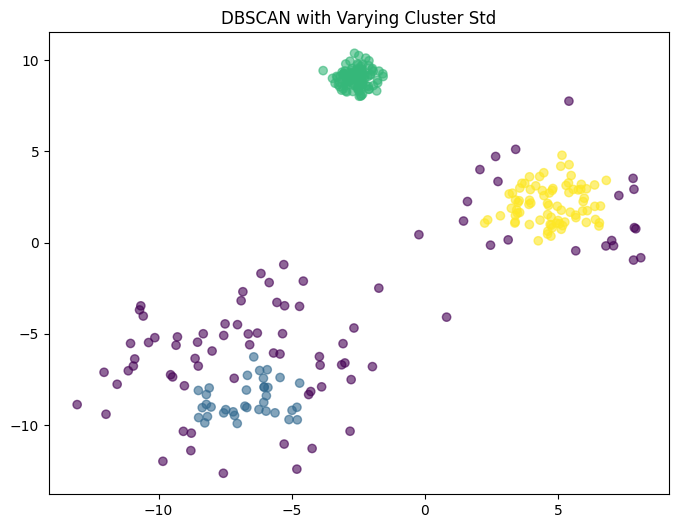

In [10]:
"""
Question 27: Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.
"""

X_var, _ = make_blobs(n_samples=300, centers=3, cluster_std=[0.5, 1.5, 2.5], random_state=42)
dbscan_var = DBSCAN(eps=0.8, min_samples=5)
labels_var = dbscan_var.fit_predict(X_var)
print("Q27 - Number of clusters:", len(set(labels_var) - {-1}))
plt.figure(figsize=(8, 6))
plt.scatter(X_var[:, 0], X_var[:, 1], c=labels_var, cmap='viridis', alpha=0.6)
plt.title('DBSCAN with Varying Cluster Std')
plt.show()

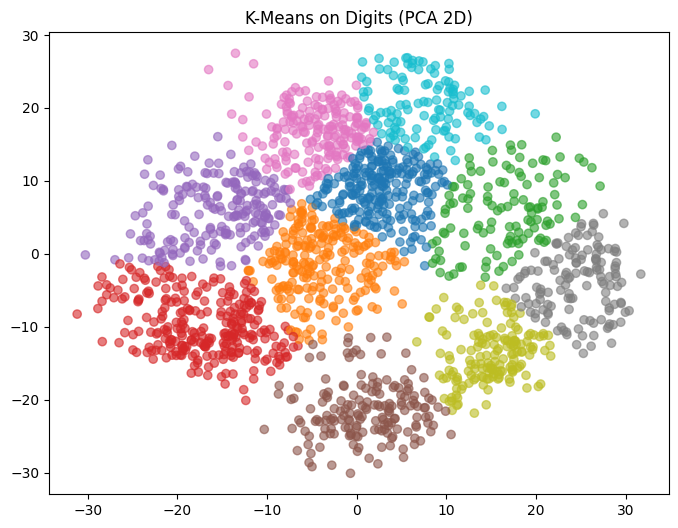

In [14]:
"""
Question 28: Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.
"""

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits()
X_digits = digits.data
pca = PCA(n_components=2)
X_digits_pca = pca.fit_transform(X_digits)
kmeans_digits = KMeans(n_clusters=10, random_state=42)
labels_digits = kmeans_digits.fit_predict(X_digits_pca)
plt.figure(figsize=(8, 6))
plt.scatter(X_digits_pca[:, 0], X_digits_pca[:, 1], c=labels_digits, cmap='tab10', alpha=0.6)
plt.title('K-Means on Digits (PCA 2D)')
plt.show()

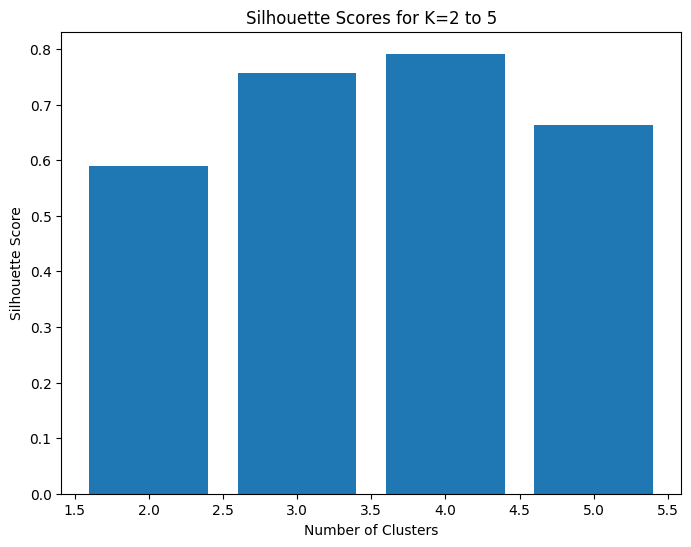

In [15]:
# Q29: Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.

from sklearn.metrics import silhouette_score
X_blobs, _ = make_blobs(n_samples=300, centers=4, random_state=42)
silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_blobs)
    score = silhouette_score(X_blobs, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(8, 6))
plt.bar(range(2, 6), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K=2 to 5')
plt.show()

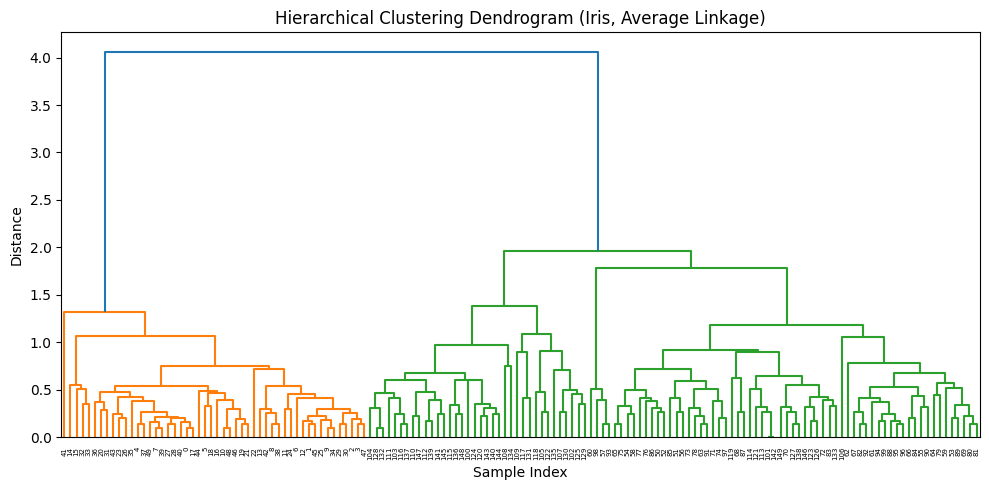

Linkage matrix shape: (149, 4)
First 5 rows of linkage matrix:
[[1.01e+02 1.42e+02 0.00e+00 2.00e+00]
 [7.00e+00 3.90e+01 1.00e-01 2.00e+00]
 [0.00e+00 1.70e+01 1.00e-01 2.00e+00]
 [9.00e+00 3.40e+01 1.00e-01 2.00e+00]
 [1.28e+02 1.32e+02 1.00e-01 2.00e+00]]


In [35]:

"""
Q30: Load the Iris dataset and use hierarchical clustering to group data.
Plot a dendrogram with average linkage.
"""

from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# 1. Load Iris dataset
iris = load_iris()
X = iris.data  # shape (150, 4): sepal length, sepal width, petal length, petal width

# 2. Compute hierarchical clustering with average linkage
# Using Euclidean distance metric
Z = linkage(X, method='average', metric='euclidean')

# 3. Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Iris, Average Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

print(f'Linkage matrix shape: {Z.shape}')
print(f'First 5 rows of linkage matrix:')
print(Z[:5])

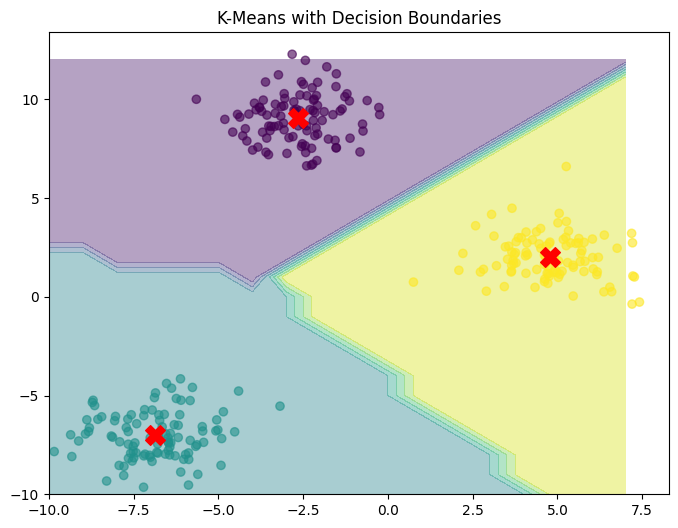

In [17]:
"""
Question 31: Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries.
"""
X_overlap, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.2, random_state=42)
kmeans_overlap = KMeans(n_clusters=3, random_state=42)
labels_overlap = kmeans_overlap.fit_predict(X_overlap)

from numpy import meshgrid, c_
h = 0.02
x_min, x_max = X_overlap[:, 0].min() - 1, X_overlap[:, 0].max() + 1
y_min, y_max = X_overlap[:, 1].min() - 1, X_overlap[:, 1].max() + 1
xx, yy = meshgrid(range(int(x_min), int(x_max)), range(int(y_min), int(y_max)))
Z = kmeans_overlap.predict(c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_overlap[:, 0], X_overlap[:, 1], c=labels_overlap, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_overlap.cluster_centers_[:, 0], kmeans_overlap.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title('K-Means with Decision Boundaries')
plt.show()

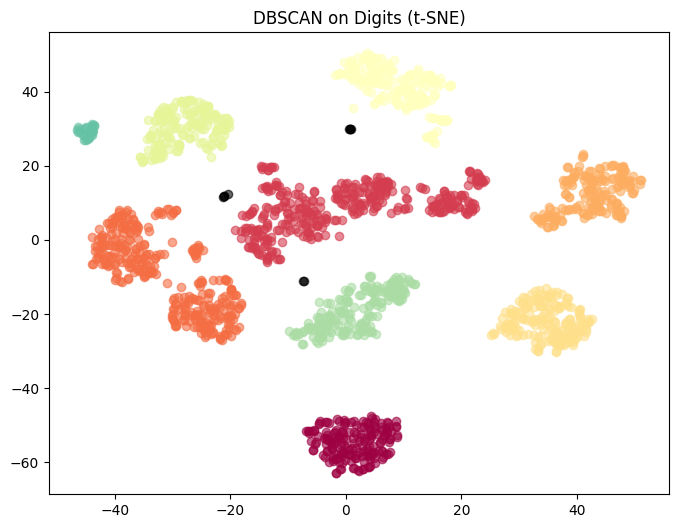

In [21]:
#32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X_digits_full = load_digits().data
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_digits_tsne = tsne.fit_transform(X_digits_full)
dbscan_digits = DBSCAN(eps=5, min_samples=5)
labels_dbscan_digits = dbscan_digits.fit_predict(X_digits_tsne)

plt.figure(figsize=(8, 6))
unique_labels_d = set(labels_dbscan_digits)

for k in unique_labels_d:
    col = 'black' if k == -1 else plt.cm.Spectral(k / len(unique_labels_d))
    plt.scatter(X_digits_tsne[labels_dbscan_digits == k, 0], X_digits_tsne[labels_dbscan_digits == k, 1], c=[col], alpha=0.6)
plt.title('DBSCAN on Digits (t-SNE)')
plt.show()

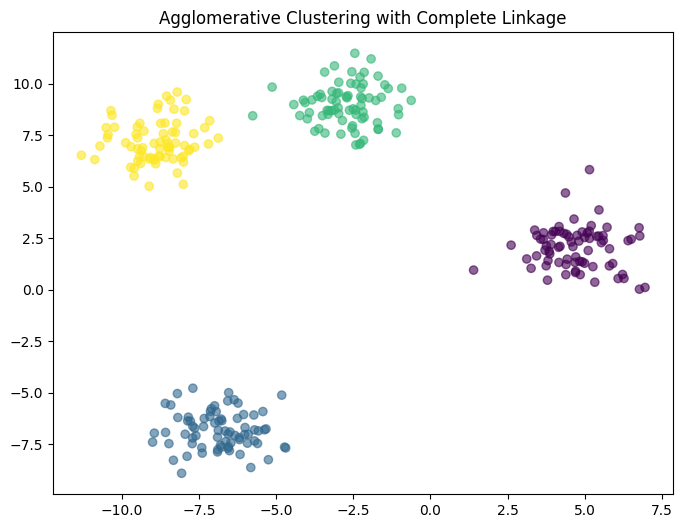

In [33]:
# Q33: Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.
X_q33, _ = make_blobs(n_samples=300, centers=4, random_state=42)
agg_complete = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels_q33 = agg_complete.fit_predict(X_q33)

plt.figure(figsize=(8, 6))
plt.scatter(X_q33[:, 0], X_q33[:, 1], c=labels_q33, cmap='viridis', alpha=0.6)
plt.title('Agglomerative Clustering with Complete Linkage')
plt.show()

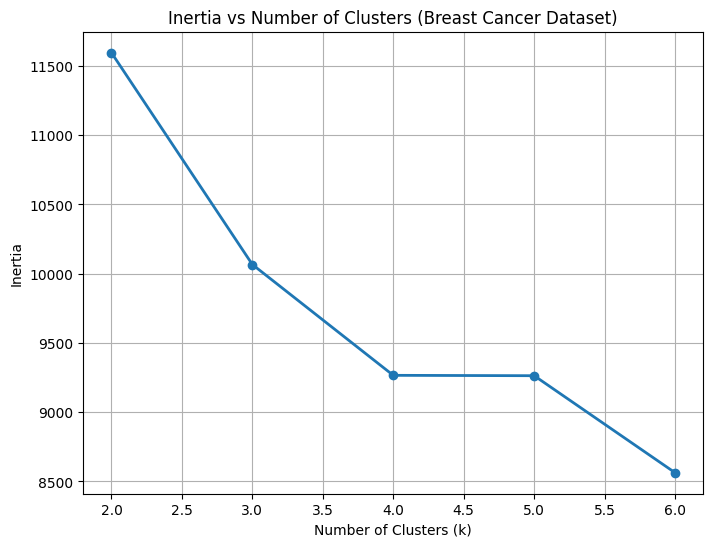

In [32]:
#34.Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_bc_q34 = load_breast_cancer().data
X_bc_q34_scaled = StandardScaler().fit_transform(X_bc_q34)
inertias = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X_bc_q34_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 7), inertias, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters (Breast Cancer Dataset)')
plt.grid(True)
plt.show()

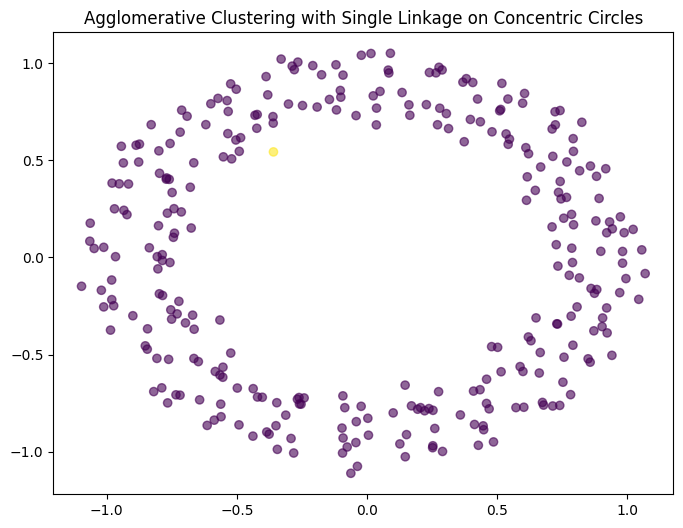

In [29]:
"""
Question 35: Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.
"""

X_circles_q35, _ = make_circles(n_samples=300, noise=0.05, random_state=42)
agg_single = AgglomerativeClustering(n_clusters=2, linkage='single')
labels_q35 = agg_single.fit_predict(X_circles_q35)

plt.figure(figsize=(8, 6))
plt.scatter(X_circles_q35[:, 0], X_circles_q35[:, 1], c=labels_q35, cmap='viridis', alpha=0.6)
plt.title('Agglomerative Clustering with Single Linkage on Concentric Circles')
plt.show()

In [28]:
# Q36: Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise).
X_wine_q36 = load_wine().data
X_wine_q36_scaled = StandardScaler().fit_transform(X_wine_q36)
dbscan_wine = DBSCAN(eps=0.5, min_samples=5)
labels_wine_q36 = dbscan_wine.fit_predict(X_wine_q36_scaled)
num_clusters = len(set(labels_wine_q36) - {-1})
print(f"Q36 - Number of clusters (excluding noise): {num_clusters}")
print(f"Number of noise points: {sum(labels_wine_q36 == -1)}")

Q36 - Number of clusters (excluding noise): 0
Number of noise points: 178


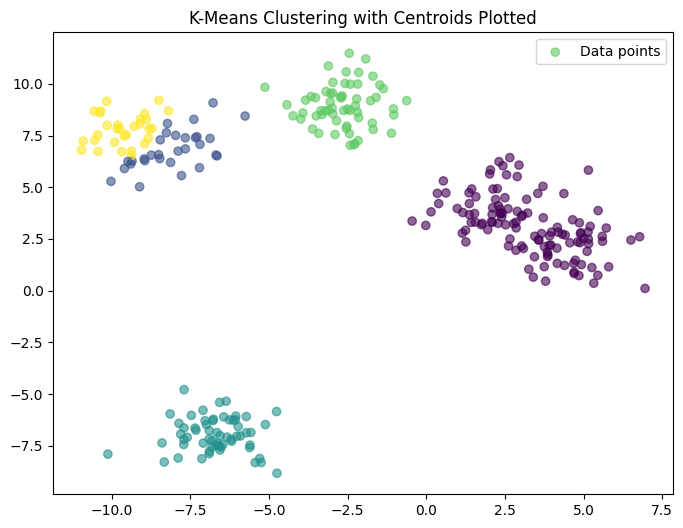

In [27]:
"""
Question 37: Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.
"""

X_q37, _ = make_blobs(n_samples=300, centers=5, random_state=42)
kmeans_q37 = KMeans(n_clusters=5, random_state=42)
labels_q37 = kmeans_q37.fit_predict(X_q37)

plt.figure(figsize=(8, 6))
plt.scatter(X_q37[:, 0], X_q37[:, 1], c=labels_q37, cmap='viridis', alpha=0.6, label='Data points')


plt.title('K-Means Clustering with Centroids Plotted')
plt.legend()
plt.show()

In [24]:
"""
Question 38: Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.
"""

X_iris_q38 = load_iris().data
X_iris_q38_scaled = StandardScaler().fit_transform(X_iris_q38)
dbscan_iris = DBSCAN(eps=0.5, min_samples=5)
labels_iris_q38 = dbscan_iris.fit_predict(X_iris_q38_scaled)
noise_points = sum(labels_iris_q38 == -1)
print(f"Q38 - Number of noise points identified by DBSCAN: {noise_points}")
print(f"Total samples: {len(X_iris_q38)}")
print(f"Clustered samples: {len(X_iris_q38) - noise_points}")

Q38 - Number of noise points identified by DBSCAN: 34
Total samples: 150
Clustered samples: 116


'\nQuestion 39: Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.\n'

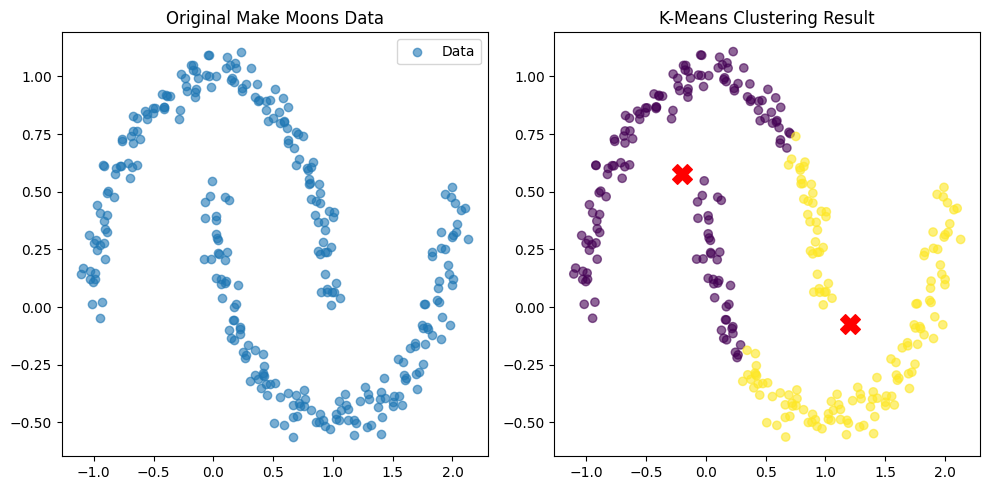

In [25]:
# Q39: Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.
X_moons_q39, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
kmeans_moons = KMeans(n_clusters=2, random_state=42)
labels_moons = kmeans_moons.fit_predict(X_moons_q39)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_moons_q39[:, 0], X_moons_q39[:, 1], alpha=0.6, label='Data')
plt.title('Original Make Moons Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_moons_q39[:, 0], X_moons_q39[:, 1], c=labels_moons, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_moons.cluster_centers_[:, 0], kmeans_moons.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title('K-Means Clustering Result')
plt.tight_layout()



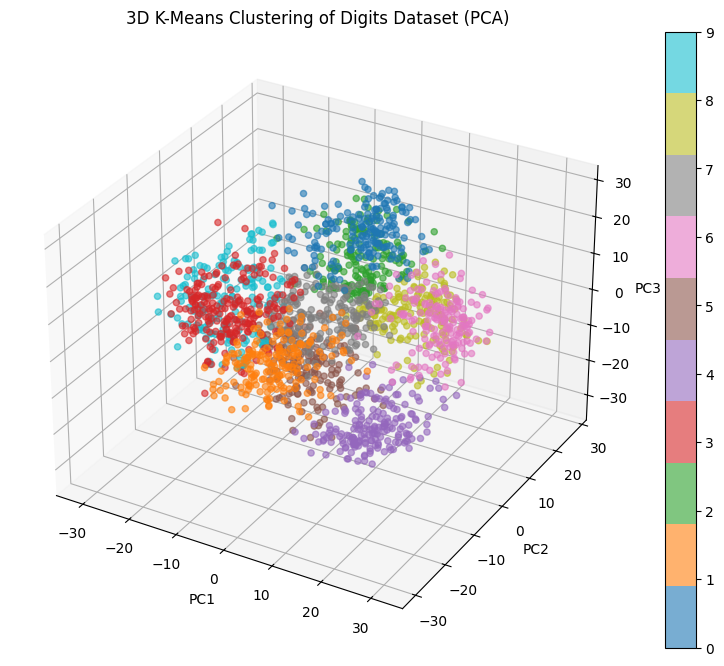

In [26]:
"""
Question 40: Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.
"""

from mpl_toolkits.mplot3d import Axes3D
X_digits_q40 = load_digits().data
pca_3d = PCA(n_components=3)
X_digits_3d = pca_3d.fit_transform(X_digits_q40)
kmeans_3d = KMeans(n_clusters=10, random_state=42)
labels_3d = kmeans_3d.fit_predict(X_digits_3d)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_digits_3d[:, 0], X_digits_3d[:, 1], X_digits_3d[:, 2], c=labels_3d, cmap='tab10', alpha=0.6)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D K-Means Clustering of Digits Dataset (PCA)')
plt.colorbar(scatter)
plt.show()